In [30]:
# read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [31]:
csv_to_read = 'D:\\python\\SoilNet\\results\\RUN_D_2023_06_01_T_13_07_Nafiseh.csv'
csv_to_read_name = csv_to_read.split('.')[0]
csv_to_read_ext = csv_to_read.split('.')[1]
df = pd.read_csv(csv_to_read)

In [32]:
# get column names
df.columns

Index(['point_id', 'y_real', 'y_pred'], dtype='object')

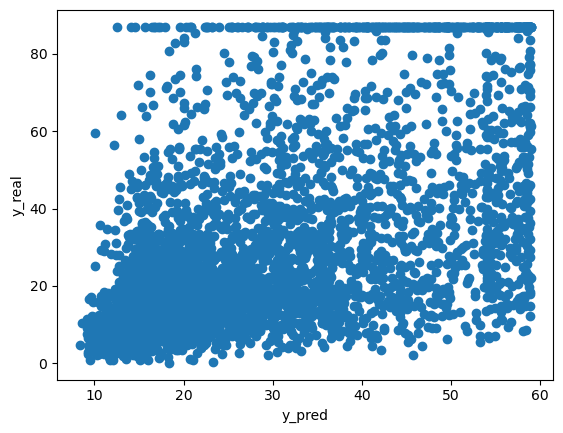

In [33]:
# scatter plotting columns y_pred and y_real
plt.scatter(df['y_pred']*87, df['y_real']*87)
plt.xlabel('y_pred')
plt.ylabel('y_real')
plt.show()



In [34]:
y_pred = df['y_pred'].values * 87
y_real = df['y_real'].values * 87
mae = np.abs(y_pred - y_real)
print('MAE: ', np.mean(mae))

MAE:  14.61774108102884


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_mean_mae(y_real, mae, step=5):
    # Calculate the mean MAE for each step
    mean_mae = []
    steps = []
    counts = []
    for i in range(0, int(np.max(y_real)), step):
        mean_mae.append(np.mean(mae[np.logical_and(y_real >= i, y_real < i+step)]))
        count = np.sum(np.logical_and(y_real >= i, y_real < i+step))
        steps.append(f"{i}-{i+step-1}")
        counts.append(count)

    plt.figure(figsize=(20, 10))
    # Create a ScalarMappable object to map colors to counts
    norm = plt.Normalize(min(counts), max(counts))
    cmap = cm.get_cmap('coolwarm')
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])

    # Plot the bar plot with colored bars
    bars = plt.bar(steps, mean_mae, color=sm.to_rgba(counts))

    # Create a color legend
    cbar = plt.colorbar(sm)
    cbar.set_label('Counts')

    # Rotate x-axis labels
    plt.xticks(rotation=45)

    plt.xlabel('OC Steps')
    plt.ylabel('Mean MAE')
    plt.title('Mean MAE per OC Step')
    plt.show()



C:\Users\moi3n\AppData\Local\Temp\ipykernel_43660\919499535.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


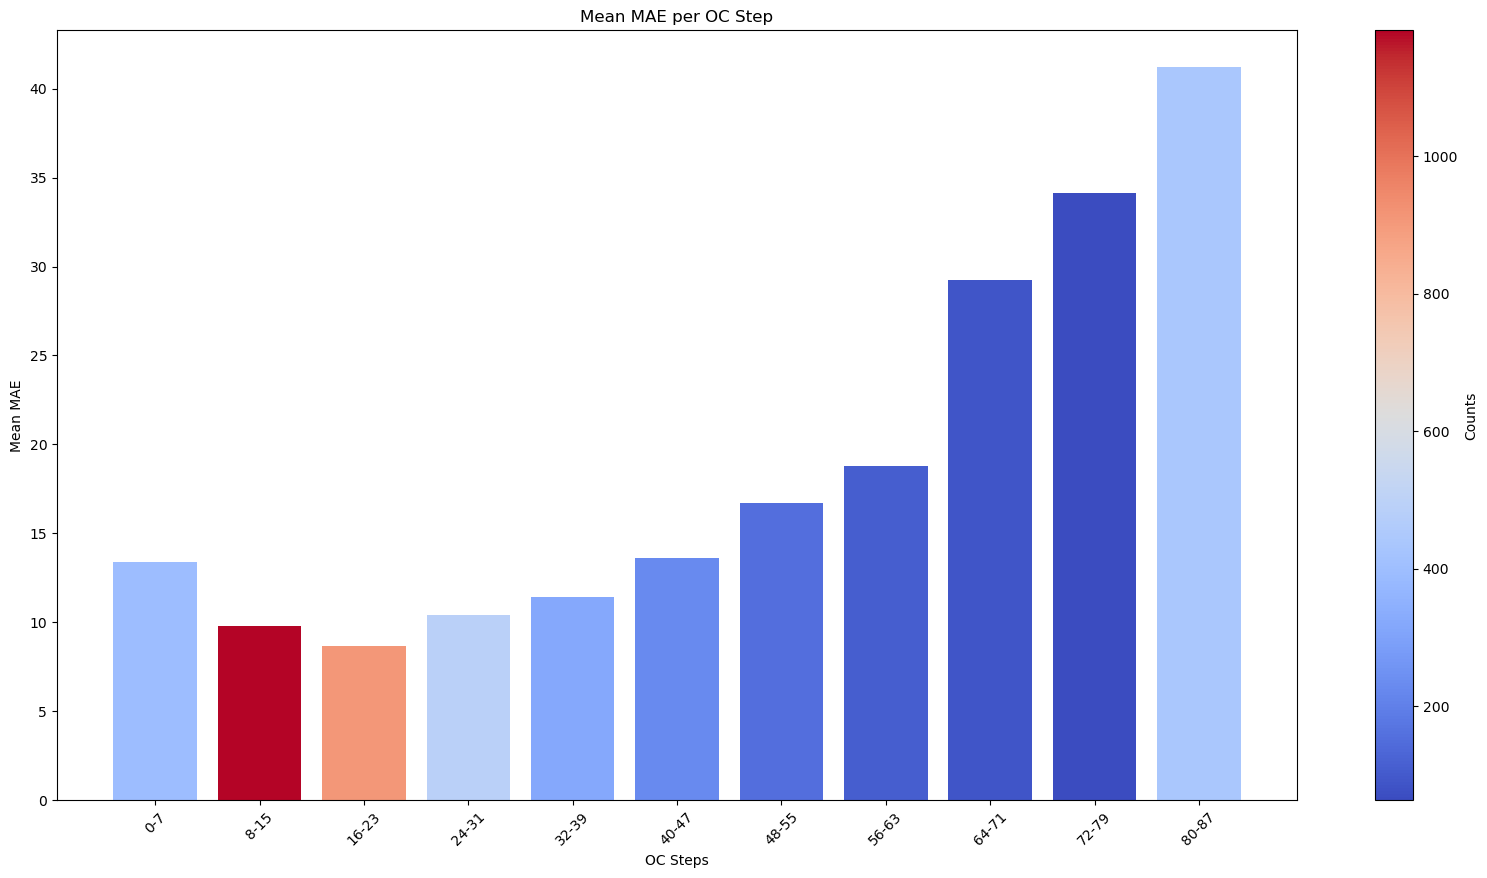

In [36]:
plot_mean_mae(y_real, mae, 8)

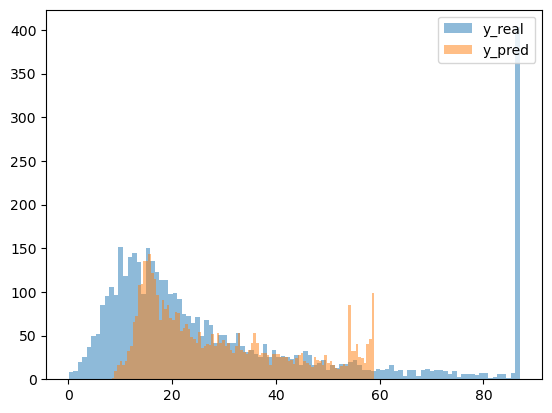

In [37]:
# histogram of y_real and y_pred
plt.hist(df['y_real']*87, bins=100, alpha=0.5, label='y_real')
plt.hist(df['y_pred']*87, bins=100, alpha=0.5, label='y_pred')
plt.legend(loc='upper right')
plt.show()


In [38]:
np.max(y_pred/87)

0.6775379180908203

In [39]:
y_pred_new = df['y_pred'].values
# Normalizing y_pred
y_pred_new = (y_pred_new - np.min(y_pred_new)) / (np.max(y_pred_new) - np.min(y_pred_new))
y_pred_new = y_pred_new * 87



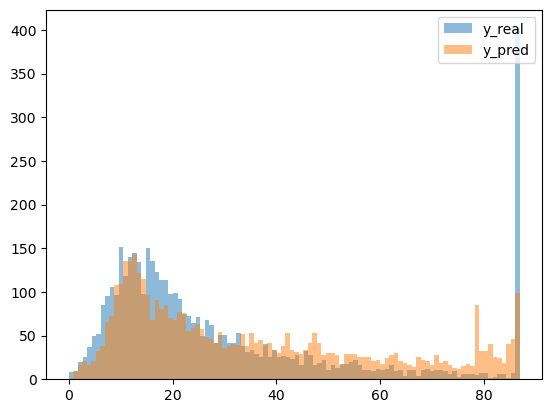

In [40]:
# histogram of y_real and y_pred
plt.hist(df['y_real']*87, bins=100, alpha=0.5, label='y_real')
plt.hist(y_pred_new, bins=100, alpha=0.5, label='y_pred')
plt.legend(loc='upper right')
plt.show()


## Saving the stretched csv

In [45]:
# replace y_pred_new with y_pred in df
df['y_pred'] = y_pred_new
df['y_real'] = df['y_real'] * 87
# save df as csv 
df.to_csv(csv_to_read_name + "_streched." + csv_to_read_ext, index=False)

In [42]:
# MAE between y_real and y_pred_new
mae = np.abs(y_pred_new - y_real)
print('MAE: ', np.mean(mae))

MAE:  16.599992268095676


In [43]:
np.max(y_real)

87.0

In [44]:
# r2 score
from sklearn.metrics import r2_score
r2_score(y_real, y_pred_new), r2_score(y_real, y_pred)

(0.1097424021888741, 0.3251120873209319)